# 2 Model Train
- 使用CV方法做训练

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_add_train.json"

def load_data(data_path):
    """Loads training dataset from json file
    
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    
    # load data
    X, y = load_data(DATA_PATH)
    
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)
    
    return (X_train, X_validation, X_test, y_train, y_validation, y_test)

def build_model(input_shape):
    """
    Generates RNN-LSTM model
    
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """
    
    # create model
    model = keras.Sequential()
    
    # 3 LSTM layers
    model.add(keras.layers.LSTM(128, input_shape = input_shape, return_sequences = True))
    model.add(keras.layers.LSTM(64))
    
    # dense layers
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(2, activation = 'softmax'))
    
    return model
    
    
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    plt.figure(dpi=450)
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy eval")
    
    # create accuracy subplot
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
def predict(model, X, y):
    
    X = X[np.newaxis, ...]
    
    # prediction = [ [0.1, 0.2, ...]]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis = 1) #[4]
    print("Expected index: {}, Predicted index: {}".format(y,  predicted_index))

2024-11-21 16:24:36.540545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 16:24:36.549290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 16:24:36.549954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 16:24:36.550876: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 259, 128)          72704     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 126,402
Trainable params: 126,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2024-11-21 16:24:40.076842: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101
2024-11-21 16:24:41.021778: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


22/22 [==============================] - 5s 66ms/step - loss: 0.6740 - accuracy: 0.5930 - val_loss: 0.4717 - val_accuracy: 0.9180
Epoch 2/100
22/22 [==============================] - 1s 43ms/step - loss: 0.4199 - accuracy: 0.8852 - val_loss: 0.3263 - val_accuracy: 0.9180
Epoch 3/100
22/22 [==============================] - 1s 45ms/step - loss: 0.3429 - accuracy: 0.8881 - val_loss: 0.2699 - val_accuracy: 0.9180
Epoch 4/100
22/22 [==============================] - 1s 42ms/step - loss: 0.2933 - accuracy: 0.8939 - val_loss: 0.2205 - val_accuracy: 0.9262
Epoch 5/100
22/22 [==============================] - 1s 47ms/step - loss: 0.2332 - accuracy: 0.9230 - val_loss: 0.1557 - val_accuracy: 0.9590
Epoch 6/100
22/22 [==============================] - 1s 44ms/step - loss: 0.1596 - accuracy: 0.9622 - val_loss: 0.0973 - val_accuracy: 0.9918
Epoch 7/100
22/22 [==============================] - 1s 44ms/step - loss: 0.1034 - accuracy: 0.9738 - val_loss: 0.0644 - val_accuracy: 0.9918
Epoch 8/100
22/22 

22/22 [==============================] - 1s 43ms/step - loss: 9.2938e-04 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9918
Epoch 59/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0136 - accuracy: 0.9971 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 60/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0242 - accuracy: 0.9956 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 61/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 62/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 9.2376e-04 - val_accuracy: 1.0000
Epoch 63/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.5198e-04 - val_accuracy: 1.0000
Epoch 64/100
22/22 [==============================] - 1s 46ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.1790e-04 - val_accuracy: 1.0

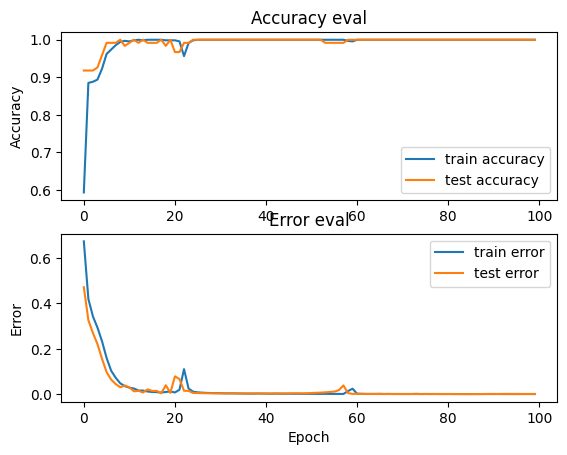

<Figure size 2880x2160 with 0 Axes>

In [2]:
if __name__ == "__main__":
    
    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.05, 0.15)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)
    
    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
    model.summary()
    
    # train the RNN-LSTM
    history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), batch_size = 32, epochs = 100)
    
    # evaluate the RNN-LSTM on the test set
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
    print("Accuracy on test set is: {}".format(test_accuracy))
    
    # make prediction on a sample
    X = X_test[0]
    y = y_test[0]

    predict(model, X, y)
    
    # plot accuracy and error over the epochs
    plot_history(history)

In [3]:
model.save('02_model/1121.h5')
# model=keras.models.load_model('02_model/1121.h5')

In [4]:
X_test_pre = model.predict(X_test)
y_pre = np.argmax(X_test_pre, axis = 1)

import sklearn.metrics as sm
matrixes = sm.confusion_matrix(y_test, y_pre)
print(matrixes)
report = sm.classification_report(y_test, y_pre)
print(report)

[[36  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00         7

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [5]:
X_dev, y_dev = load_data("data_add.json")
y_dev_pre = np.argmax(model.predict(X_dev), axis = 1)
matrixes = sm.confusion_matrix(y_dev, y_dev_pre)
print(matrixes)
report = sm.classification_report(y_dev, y_dev_pre)
print(report)

[[780   2]
 [  2  79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       0.98      0.98      0.98        81

    accuracy                           1.00       863
   macro avg       0.99      0.99      0.99       863
weighted avg       1.00      1.00      1.00       863



In [6]:
test_error, test_accuracy = model.evaluate(X_dev, y_dev, verbose = 1)
print("Accuracy on dev set is: {}".format(test_accuracy))

27/27 [==============================] - 1s 24ms/step - loss: 0.0136 - accuracy: 0.9954
Accuracy on dev set is: 0.9953650236129761
